In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere

In [2]:
circuit = QuantumCircuit(3, 3)
 
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [3]:
print(circuit) # default (text) circuit representation

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw() # same thing, but for some reason this is a bit prettier

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

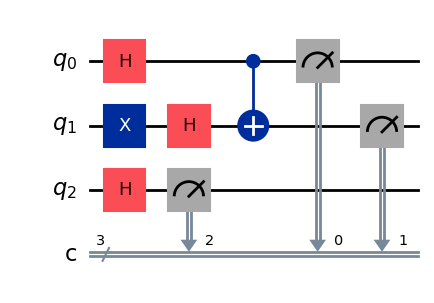

In [5]:
circuit.draw(output='mpl')

In [8]:
# circuit.draw(output='latex') # this one would work if I had latex on this machine

## Plotting Data Resulting from Circuits

In [9]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
 
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])
 
# execute the quantum circuit
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(circ, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 483, '11': 517}


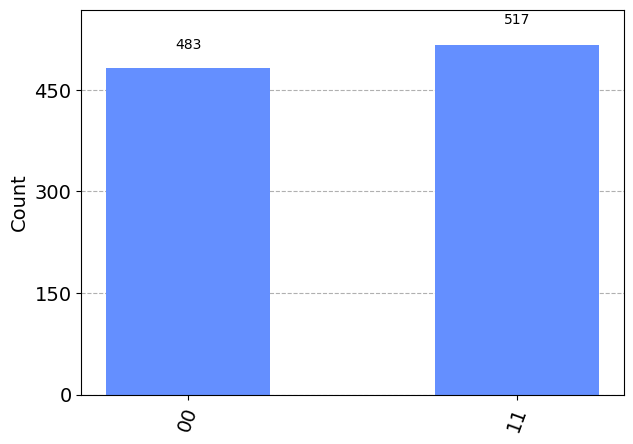

In [10]:
plot_histogram(counts)

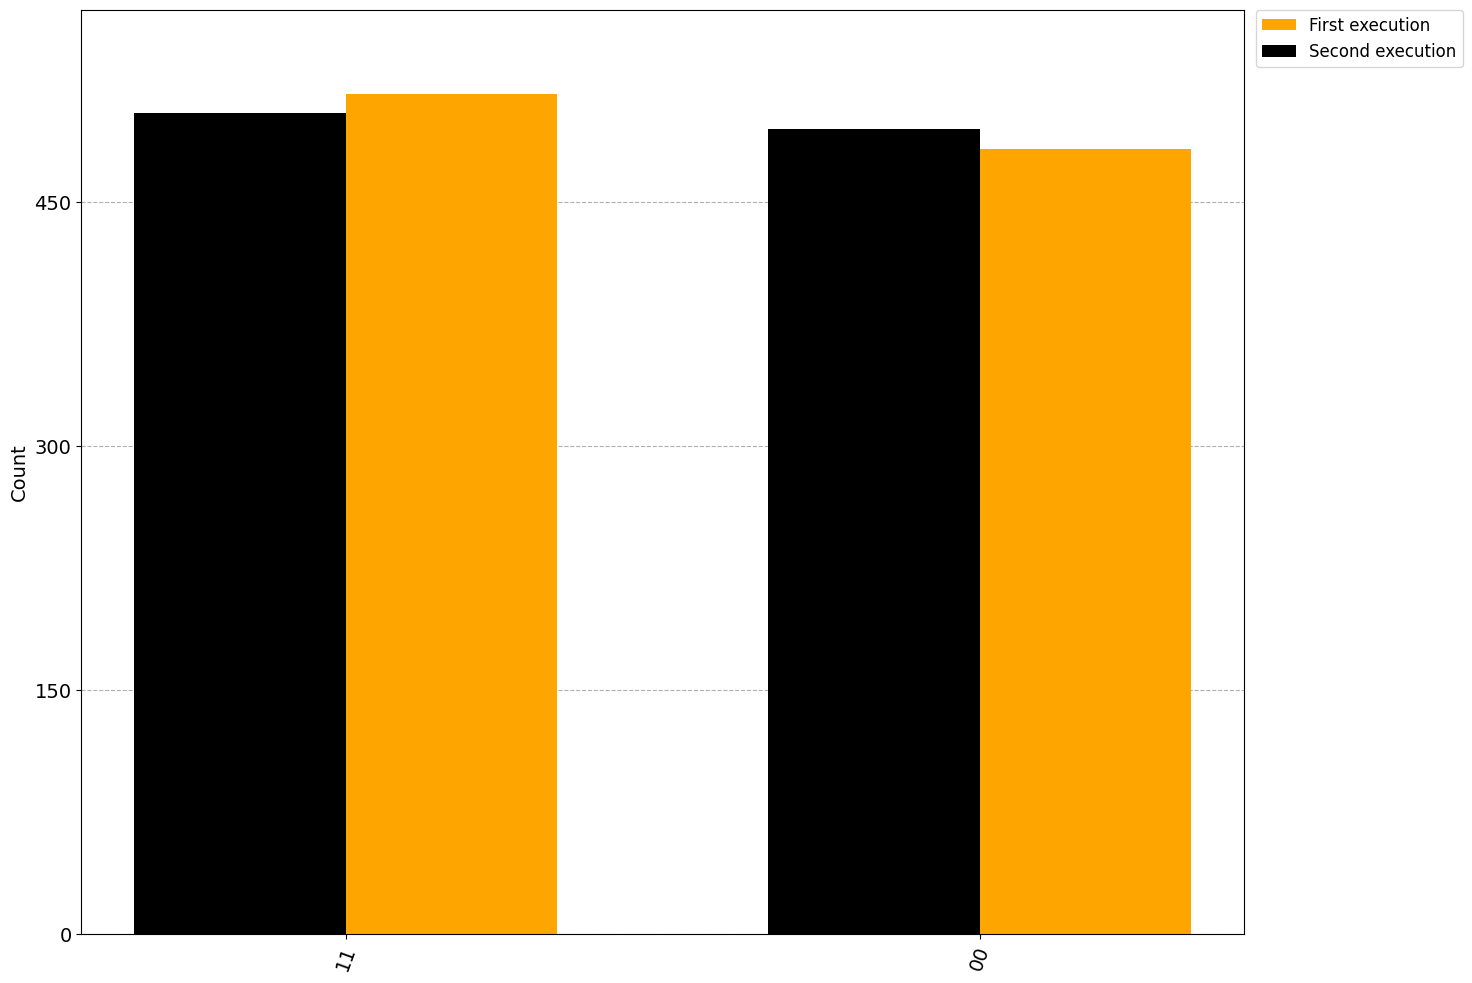

In [11]:
# Execute two-qubit Bell state again

second_result = backend.run(circ, shots=1000).result()
second_counts  = second_result.get_counts(circ)
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)